In [6]:

import pandas as pd
import gdown

# Google Drive file ID (extracted from the URL)
file_id = '16vLGdWIFSC-zOUMA90Js8xDlRXBZj3tk'
download_url = f'https://drive.google.com/uc?id={file_id}'

# Local path to save the file
spam_file_path = 'spam.csv'

# Download the file from Google Drive
gdown.download(download_url, spam_file_path, quiet=False)

# Load the CSV file
spam_df = pd.read_csv(spam_file_path, encoding='Windows-1252')
print(spam_df.head())


Downloading...
From: https://drive.google.com/uc?id=16vLGdWIFSC-zOUMA90Js8xDlRXBZj3tk
To: /content/spam.csv
100%|██████████| 504k/504k [00:00<00:00, 103MB/s]

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [7]:
# Step 1: Load the spam.csv file to inspect its structure and content
# import pandas as pd

# # Load the CSV file
# spam_file_path = '/content/spam.csv'
# spam_df = pd.read_csv(spam_file_path, encoding='Windows-1252')


In [8]:
print(spam_df.columns)


Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [9]:

# Display the first few rows of the dataset
print(spam_df.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [10]:

# Step 1: Clean the spam.csv dataset
# Drop unnecessary columns and rename the relevant ones
spam_df = spam_df[['v1', 'v2']]
spam_df.columns = ['label', 'message']


In [11]:

# Display the cleaned dataset's head and check for null values
print(spam_df.head())

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [12]:

print(spam_df.isnull().sum())


label      0
message    0
dtype: int64


In [13]:

# Add preprocessing steps to the notebook

# Preprocessing the data
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Encode labels
spam_df['label'] = spam_df['label'].map({'ham': 0, 'spam': 1})

# Split the data
X_train, X_test, y_train, y_test = train_test_split(spam_df['message'], spam_df['label'], test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

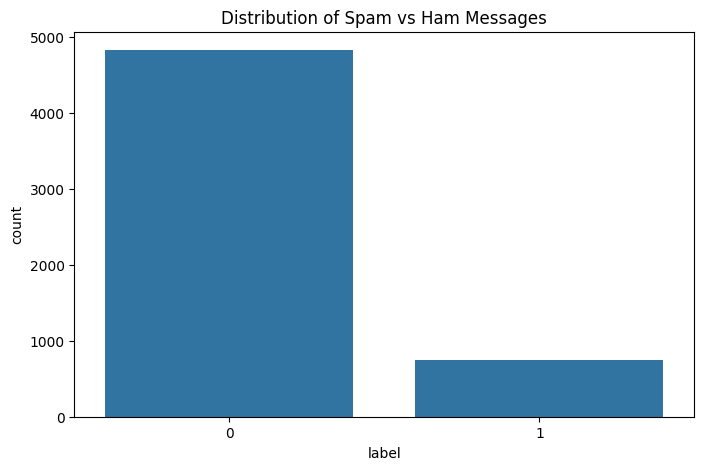

In [14]:

# Plot class distribution

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.countplot(data=spam_df, x='label')
plt.title('Distribution of Spam vs Ham Messages')
plt.show()

In [15]:

# Display basic info
print("Dataset Shape:", spam_df.shape)
print("\
Class Distribution:")
print(spam_df['label'].value_counts(normalize=True))

Dataset Shape: (5572, 2)
Class Distribution:
label
0    0.865937
1    0.134063
Name: proportion, dtype: float64


In [16]:

# Train a Machine Learning model
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Train the model
ml_model = MultinomialNB()
ml_model.fit(X_train_vec, y_train)

# Evaluate the model
ml_predictions = ml_model.predict(X_test_vec)
print('ML Model Accuracy:', accuracy_score(y_test, ml_predictions))
print(classification_report(y_test, ml_predictions))

ML Model Accuracy: 0.9838565022421525
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [17]:
# Import necessary libraries for Deep Learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


# Tokenize and pad sequences
max_words = 5000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Build the Deep Learning model
dl_model = Sequential([
    Embedding(max_words, 128, input_length=max_len),
    LSTM(64, return_sequences=True),
    Dropout(0.5),
    LSTM(32),
    Dense(1, activation='sigmoid')
])

dl_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
dl_model.fit(X_train_pad, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model
dl_loss, dl_accuracy = dl_model.evaluate(X_test_pad, y_test)
print('DL Model Accuracy:', dl_accuracy)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


112/112 ━━━━━━━━━━━━━━━━━━━━ 21s 135ms/step - accuracy: 0.9017 - loss: 0.3133 - val_accuracy: 0.9854 - val_loss: 0.0639
Epoch 2/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 14s 129ms/step - accuracy: 0.9894 - loss: 0.0491 - val_accuracy: 0.9865 - val_loss: 0.0555
Epoch 3/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 22s 145ms/step - accuracy: 0.9944 - loss: 0.0236 - val_accuracy: 0.9888 - val_loss: 0.0550
Epoch 4/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 15s 138ms/step - accuracy: 0.9984 - loss: 0.0052 - val_accuracy: 0.9832 - val_loss: 0.0556
Epoch 5/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 20s 137ms/step - accuracy: 0.9998 - loss: 0.0028 - val_accuracy: 0.9865 - val_loss: 0.0673
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9869 - loss: 0.0734
DL Model Accuracy: 0.9820627570152283


In [18]:
# Import required libraries
from sklearn.feature_extraction.text import TfidfVectorizer
# Load and preprocess data


df = pd.read_csv('spam.csv', encoding='Windows-1252')
df = df[['v1', 'v2']]
df.columns = ['label', 'text']
df['label'] = df['label'].map({'ham': 0, 'spam': 1})


# Prepare data
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [19]:

# 1. Naive Bayes
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_pred = nb_model.predict(X_test_tfidf)
print("Naive Bayes Performance:")
print(classification_report(y_test, nb_pred))

Naive Bayes Performance:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



In [20]:

# 2. Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_tfidf, y_train)
lr_pred = lr_model.predict(X_test_tfidf)
print("\
Logistic Regression Performance:")
print(classification_report(y_test, lr_pred))

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       0.99      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [21]:

# 3. Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)
rf_pred = rf_model.predict(X_test_tfidf)
print("\
Random Forest Performance:")
print(classification_report(y_test, rf_pred))

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       1.00      0.85      0.92       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [22]:

# 4. XGBoost
import xgboost as xgb
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train_tfidf, y_train)
xgb_pred = xgb_model.predict(X_test_tfidf)
print("\
XGBoost Performance:")
print(classification_report(y_test, xgb_pred))

XGBoost Performance:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.85      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



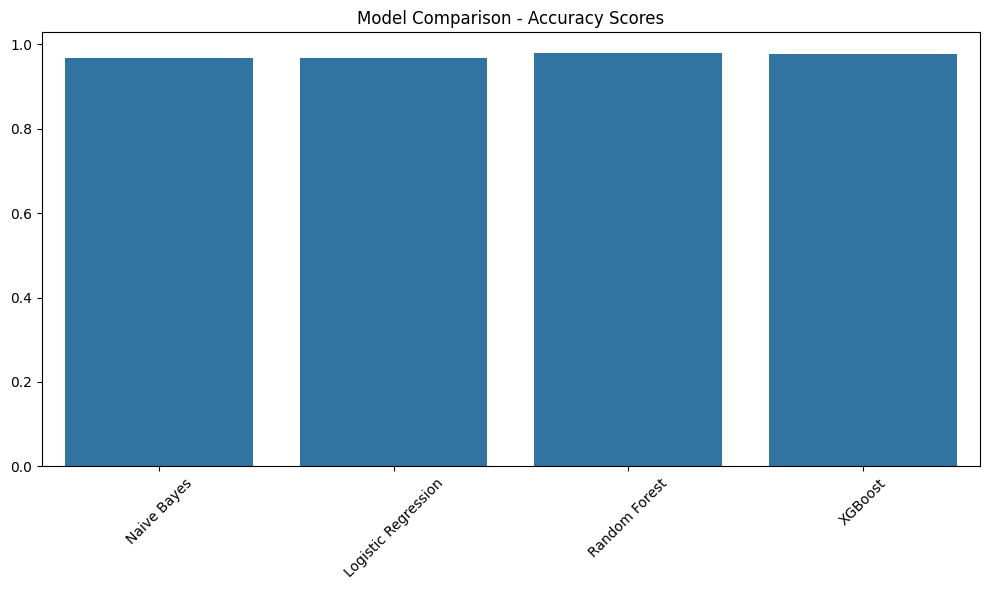

In [23]:
# Plot model comparison
models = ['Naive Bayes', 'Logistic Regression', 'Random Forest', 'XGBoost']
accuracies = [
    accuracy_score(y_test, nb_pred),
    accuracy_score(y_test, lr_pred),
    accuracy_score(y_test, rf_pred),
    accuracy_score(y_test, xgb_pred)
]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies)
plt.title('Model Comparison - Accuracy Scores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:

# Install XGBoost
%pip install xgboost

In [25]:

# Complete XGBoost implementation
import xgboost as xgb
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train_tfidf, y_train)
xgb_pred = xgb_model.predict(X_test_tfidf)
print("XGBoost Performance:")
print(classification_report(y_test, xgb_pred))

XGBoost Performance:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.85      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



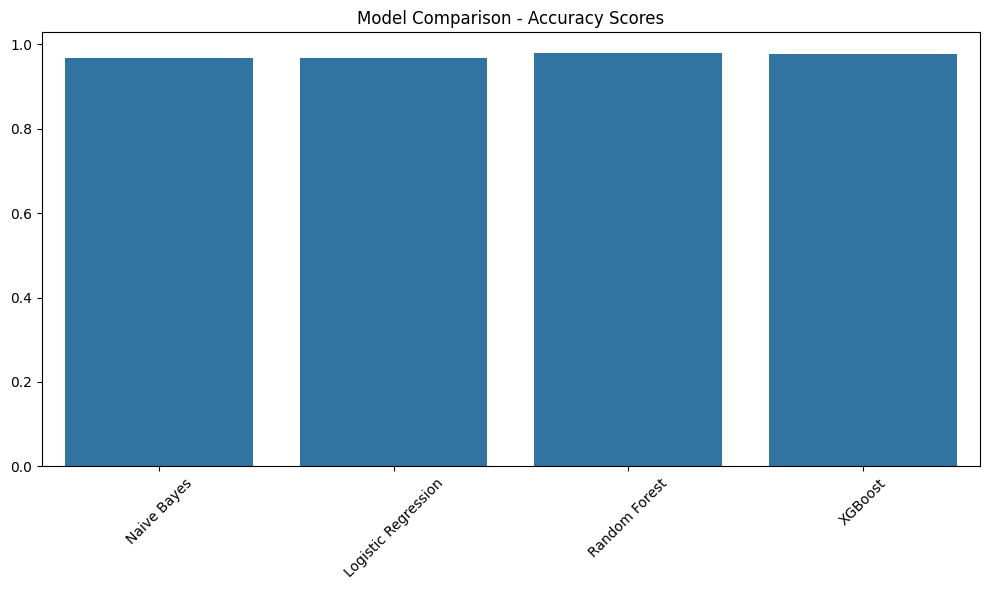

In [26]:

# Plot final model comparison
models = ['Naive Bayes', 'Logistic Regression', 'Random Forest', 'XGBoost']
accuracies = [
    accuracy_score(y_test, nb_pred),
    accuracy_score(y_test, lr_pred),
    accuracy_score(y_test, rf_pred),
    accuracy_score(y_test, xgb_pred)
]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies)
plt.title('Model Comparison - Accuracy Scores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [27]:

X=spam_df['message']
y=spam_df['label']

<ipython-input-28-28c46a5d2631>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='viridis')


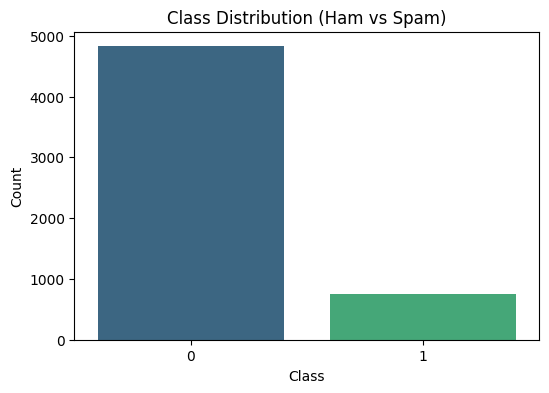

In [28]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y, palette='viridis')
plt.title('Class Distribution (Ham vs Spam)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

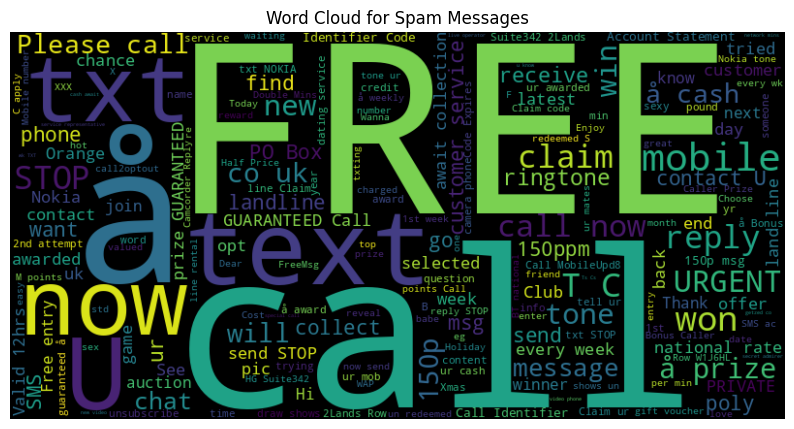

In [29]:

# Generate a word cloud for spam messages
from wordcloud import WordCloud
spam_messages = X[y == 1]
spam_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(spam_messages))
plt.figure(figsize=(10, 6))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Messages')
plt.show()

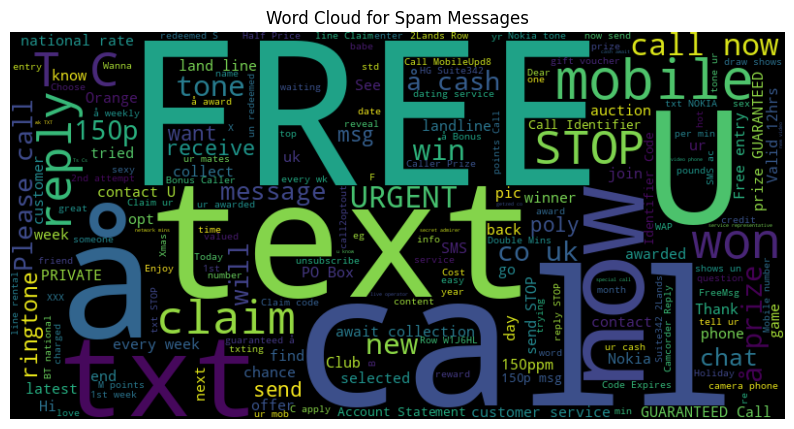

In [30]:

# a word cloud for spam messages
spam_messages = X[y == 1]
spam_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(spam_messages))
plt.figure(figsize=(10, 6))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Messages')
plt.show()

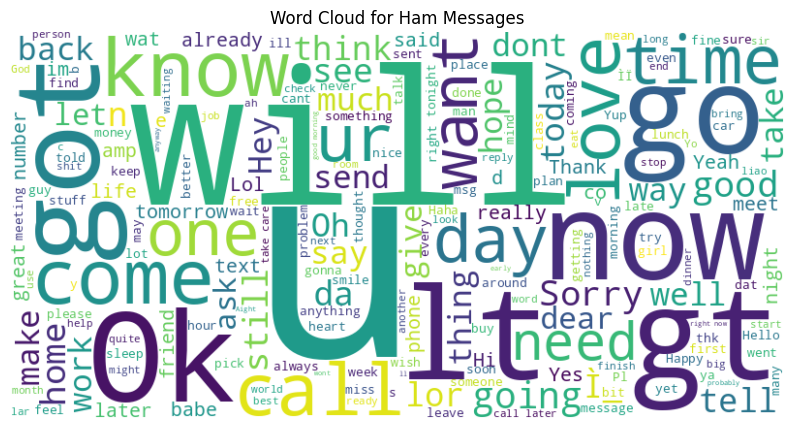

In [31]:
#a word cloud for ham messages
ham_messages = X[y == 0]
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(ham_messages))
plt.figure(figsize=(10, 6))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Ham Messages')
plt.show()

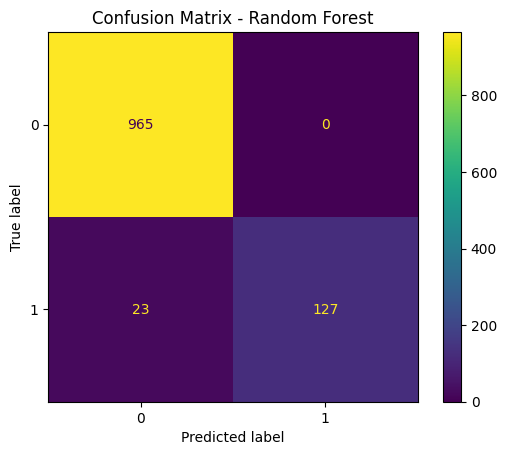

In [32]:

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(rf_model, X_test_tfidf, y_test, cmap='viridis')
plt.title('Confusion Matrix - Random Forest')
plt.show()